a= 1948.5992816593825
b= -2867.2264816111892
best_step= 0.7357147538229422


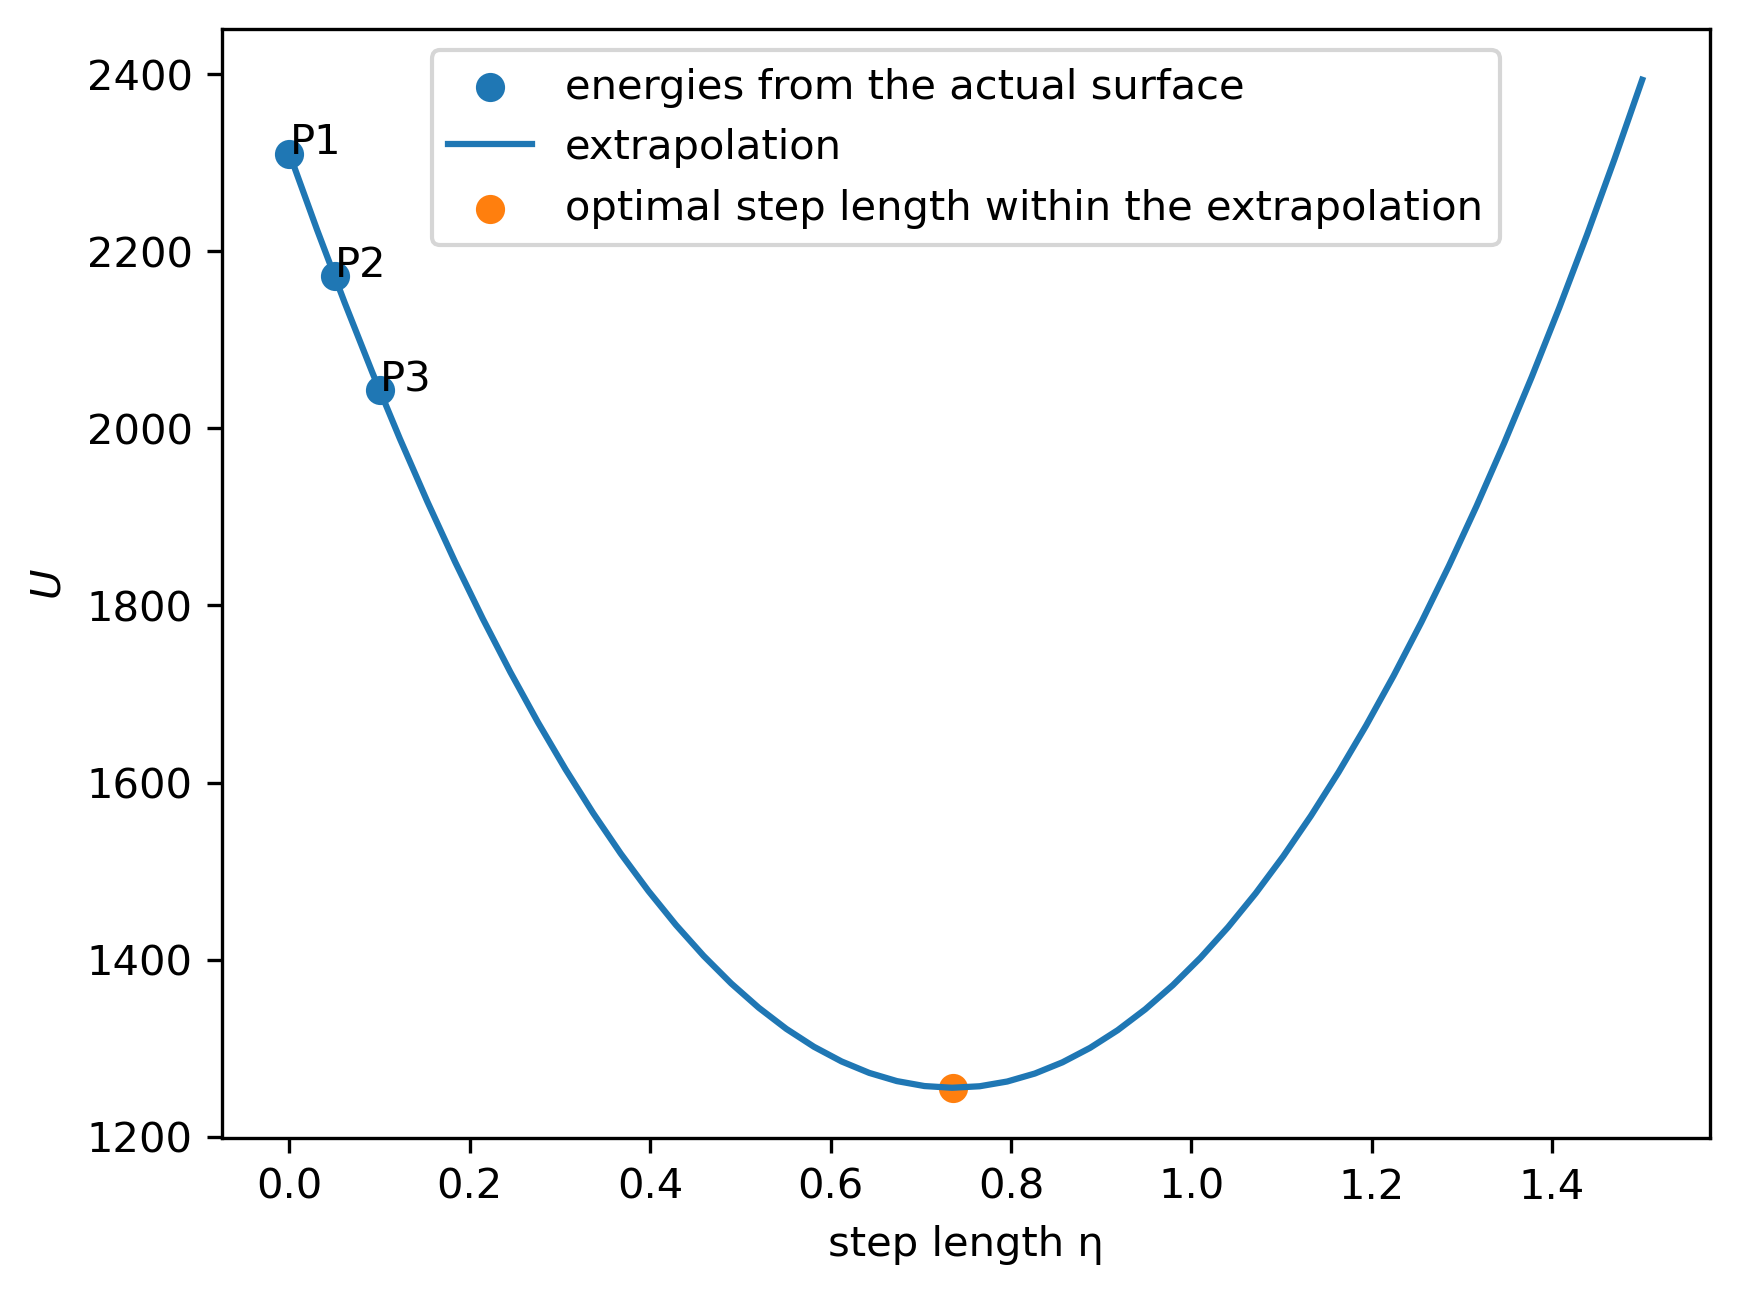

In [36]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.1

x1 = 0
u_0 =  2310.07544

x2 = 0.5*alpha
u_x2 = 2171.5856141235890

x3 = alpha
u_x3 = 2042.8387846554749

plt.figure(dpi=300)
plt.scatter([x1,x2,x3],[u_0,u_x2,u_x3], label="energies from the actual surface")

def parabola(x,a,b,c):
    return a*x**2+b*x+c

b = ((u_x3-u_0)*x2**2 - (u_x2-u_0)*x3**2) / (x2*x3*(x2-x3))
a = (u_x3-u_0)/x3**2 - b/x3
c = u_0


x = np.linspace(x1,x3)
x = np.linspace(0,1.5)
plt.plot(x,parabola(x,a,b,c),label="extrapolation")


plt.scatter(-b/(2*a),parabola(-b/(2*a),a,b,c),label ="optimal step length within the extrapolation") #, label="$\eta^* = -\frac{b}{2\cdota} $")

plt.xlabel("step length η")
plt.ylabel("$U$")
plt.text(x1,u_0,"P1")
plt.text(x2,u_x2,"P2")
plt.text(x3,u_x3,"P3")
plt.legend()
plt.savefig("linesearch.png")
print("a=",a)
print("b=",b)
print("best_step=",-b/(2*a))

In [33]:
coordlist = np.array([-0.21131900314889848, 0.19911300296701492, 0.0000000000000000, -3.8140000568330289E-003, 0.20369000303521753,4.0000000596046453E-006])
forces = np.array([7183.7024164992526,7342.1554945470925, 7183.8408941728794,-7183.7024164992526, -7342.1554945470925, -7183.8408941728794])
gradnorm = np.sqrt(np.dot(forces,forces))
b12 = np.sqrt((coordlist[0]-coordlist[3])**2 + (coordlist[1]-coordlist[4])**2 + (coordlist[2]-coordlist[5])**2)
print(b12)
alpha = 0.01
print(gradnorm)
point1 = np.zeros(6)
point2 = np.zeros(6)
point3 = np.zeros(6)

print("\nPoint1")
point1[:] = coordlist[:] + 0
print(point1)
b12 = np.sqrt((point1[0]-point1[3])**2 + (point1[1]-point1[4])**2 + (point1[2]-point1[5])**2)
print(b12)

print("\nPoint2")
point2[:] = coordlist[:] + 0.5*alpha *forces[:]/gradnorm
print(point2)
b12 = np.sqrt((point2[0]-point2[3])**2 + (point2[1]-point2[4])**2 + (point2[2]-point2[5])**2)
print(b12)

print("\nPoint3")
point3[:] = coordlist[:] + alpha *forces[:]/gradnorm
print(point3)
b12 = np.sqrt((point3[0]-point3[3])**2 + (point3[1]-point3[4])**2 + (point3[2]-point3[5])**2)
print(b12)

print(coordlist)

0.20755547512379052
17726.838280286527

Point1
[-2.11319003e-01  1.99113003e-01  0.00000000e+00 -3.81400006e-03
  2.03690003e-01  4.00000006e-06]
0.20755547512379052

Point2
[-0.20929278  0.20118392  0.00202626 -0.00584022  0.20161909 -0.00202226]
0.20349330111492286

Point3
[-0.20726656  0.20325483  0.00405252 -0.00786644  0.19954817 -0.00404852]
0.19959902791204903
[-2.11319003e-01  1.99113003e-01  0.00000000e+00 -3.81400006e-03
  2.03690003e-01  4.00000006e-06]
